In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from  sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB  
from sklearn.svm import SVC
import seaborn as sns

import  warnings; warnings.filterwarnings('ignore')
%matplotlib inline 

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data_train =pd.read_csv('../input/santander-customer-transaction-prediction/train.csv', index_col='ID_code')
data_test =pd.read_csv('../input/santander-customer-transaction-prediction/test.csv', index_col='ID_code')

In [3]:
data_train.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,
train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
print(data_train.shape)
print("--"*20)
print(data_test.shape)

(200000, 201)
----------------------------------------
(200000, 200)


In [5]:
print(data_train.isnull().sum())
print("--"*20)
print(data_test.isnull().sum())

target     0
var_0      0
var_1      0
var_2      0
var_3      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 201, dtype: int64
----------------------------------------
var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 200, dtype: int64


In [6]:
X=data_train.drop(['target'],axis=1)
Y=data_train['target']

In [7]:
Y.value_counts()

0    179902
1     20098
Name: target, dtype: int64

this split for get sample from data because visualization

In [8]:
std=StandardScaler(copy=True, with_mean=True, with_std=True)
X_std=pd.DataFrame(std.fit_transform(X),columns=X.columns,index=X.index)
#==========
x_train, x_test, y_train, y_test = train_test_split(X_std, Y, train_size=0.10,test_size=0.10,stratify=Y, random_state=44, shuffle =True)
# x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.10,test_size=0.10,stratify=Y, random_state=44, shuffle =True)


In [9]:
print(x_train.shape,x_test.shape)
print("-"*25)
y_train.value_counts()

(20000, 200) (20000, 200)
-------------------------


0    17990
1     2010
Name: target, dtype: int64

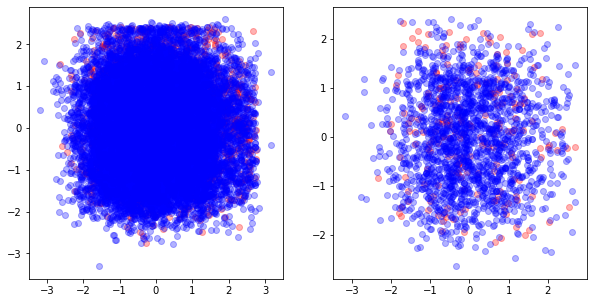

In [10]:
plt.subplots(1,2,figsize=(10,5))
a1=x_train.loc[y_train==1,'var_0']
a2=x_train.loc[y_train==0,'var_0']
b1=x_train.loc[y_train==1,'var_1']
b2=x_train.loc[y_train==0,'var_1']
plt.subplot(1,2,1)
plt.scatter(a1,b1,c='r',alpha=0.3)
plt.scatter(a2,b2,c='b',alpha=0.3)
#------------------
a1=x_train.loc[y_train==1,'var_0'][::10]
a2=x_train.loc[y_train==0,'var_0'][::10]
b1=x_train.loc[y_train==1,'var_1'][::10]
b2=x_train.loc[y_train==0,'var_1'][::10]
plt.subplot(1,2,2)
plt.scatter(a1,b1,c='r',alpha=0.3)
plt.scatter(a2,b2,c='b',alpha=0.3)

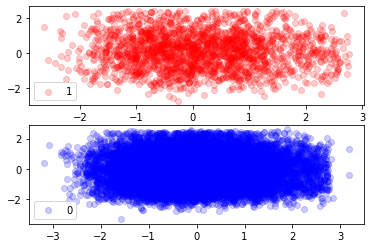

In [11]:
plt.subplots(2,1)
a1=x_train.loc[y_train==1,'var_0']
a2=x_train.loc[y_train==0,'var_0']
b1=x_train.loc[y_train==1,'var_1']
b2=x_train.loc[y_train==0,'var_1']
plt.subplot(2,1,1)
plt.scatter(a1,b1,c='r',label="1",alpha=0.2)
plt.legend()
plt.subplot(2,1,2)
plt.scatter(a2,b2,c='b',label="0",alpha=0.2)
plt.legend()


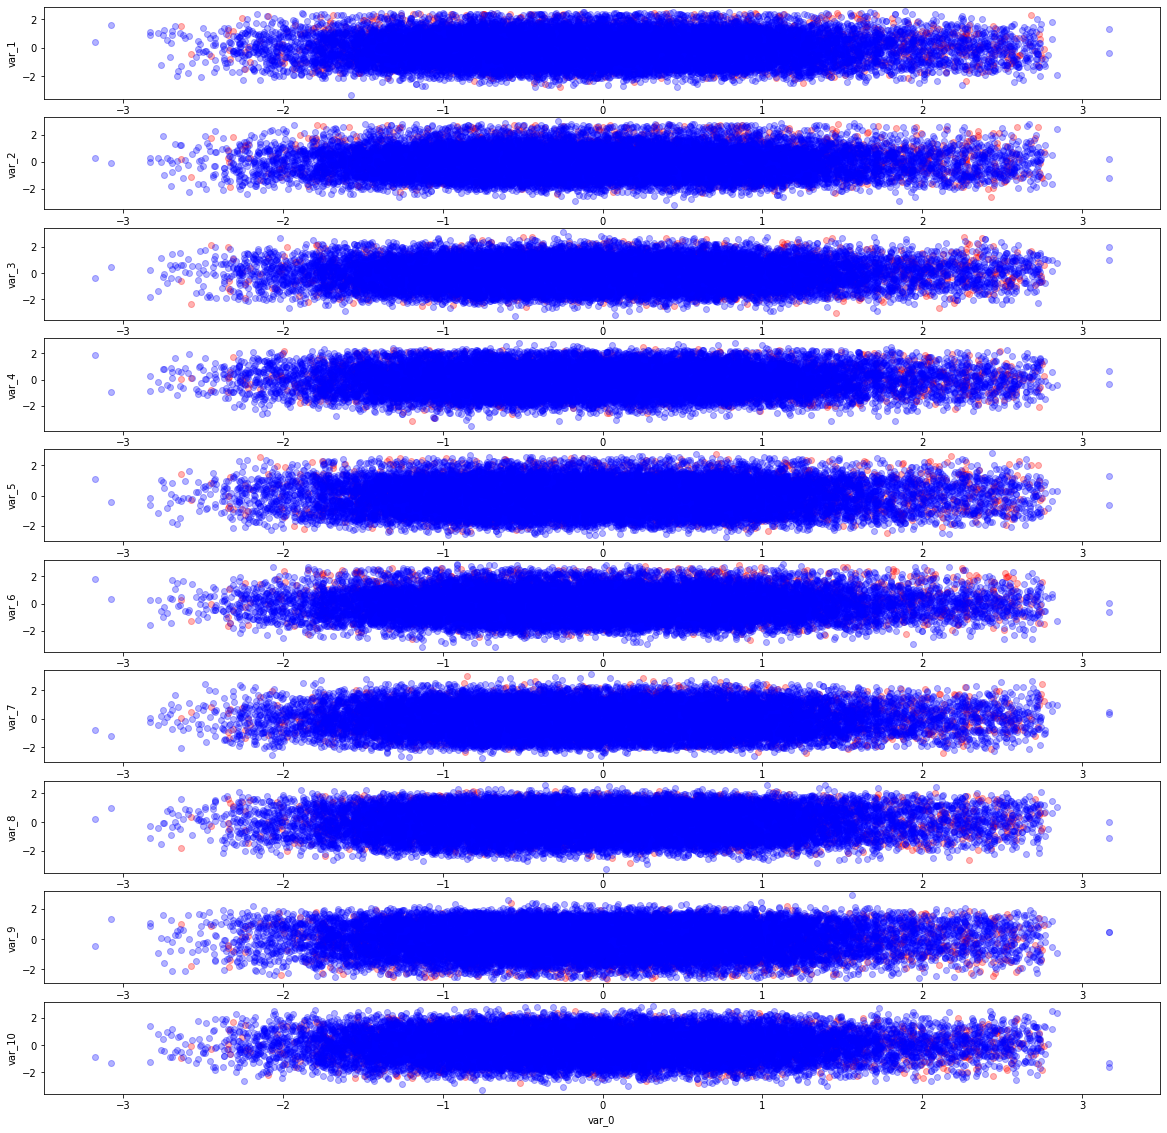

In [12]:
fig, axs= plt.subplots(9,1,figsize=(20,20))
col=[[i,j] for i in  x_train.columns[:1] for j in  x_train.columns[:11] if i!=j]

for i in range(10):
    a1=x_train.loc[y_train==1,col[i][0]]
    a2=x_train.loc[y_train==0,col[i][0]]
    b1=x_train.loc[y_train==1,col[i][1]]
    b2=x_train.loc[y_train==0,col[i][1]]
    plt.subplot(10,1,i+1)
    plt.scatter(a1,b1,c='r',alpha=0.3)
    plt.scatter(a2,b2,c='b',alpha=0.3)
    plt.xlabel(col[i][0])
    plt.ylabel(col[i][1])

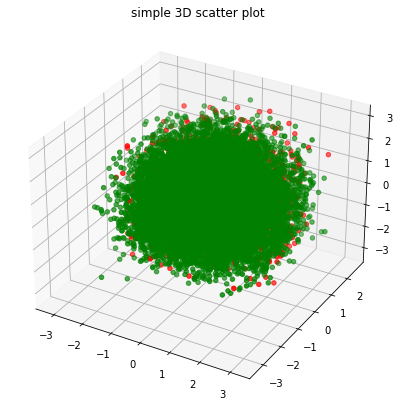

In [13]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

x_0,y_0,z_0=x_train.loc[y_train==0,'var_0'],x_train.loc[y_train==0,'var_1'],x_train.loc[y_train==0,'var_2']
x_1,y_1,z_1=x_train.loc[y_train==1,'var_0'],x_train.loc[y_train==1,'var_1'],x_train.loc[y_train==1,'var_2']

# Creating plot
ax.scatter3D(x_0,y_0,z_0, color = "g",)
ax.scatter3D(x_1,y_1,z_1, color = "r")
plt.title("simple 3D scatter plot")
# show plot
plt.show()

In [14]:
import plotly.express as px

fig = px.scatter_3d( x=x_train['var_0'], y=x_train['var_1'], z=x_train['var_2'],color=y_train)#species

fig.show()

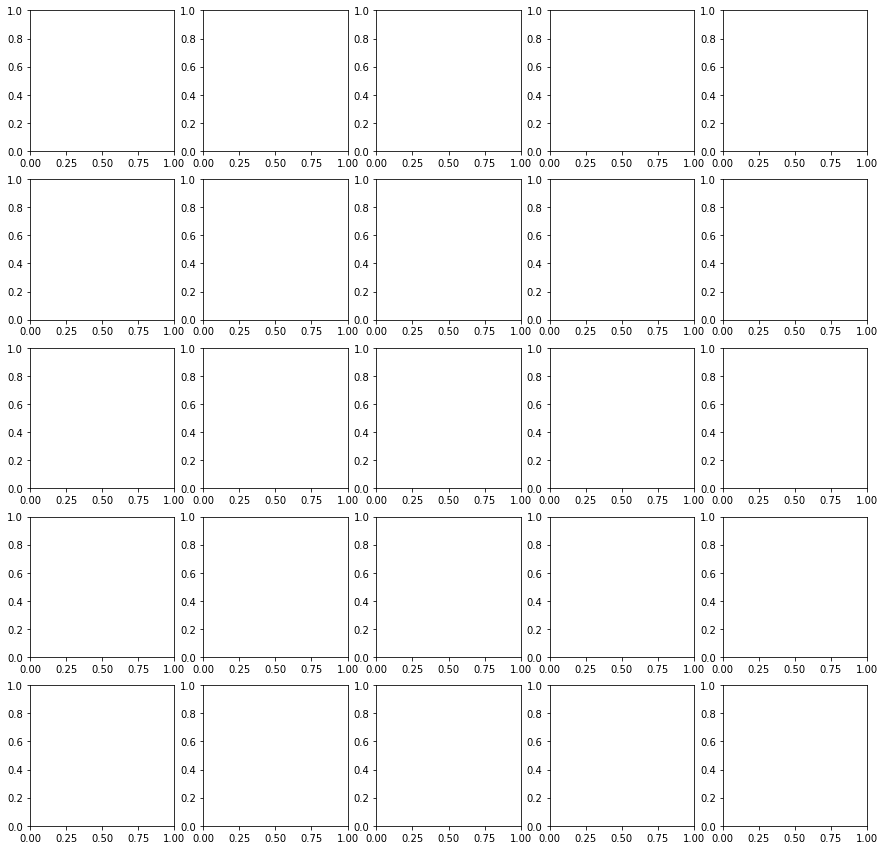

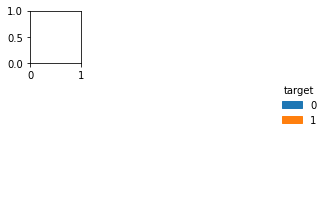

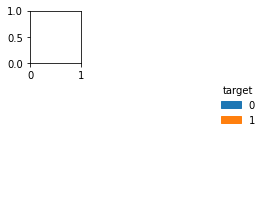

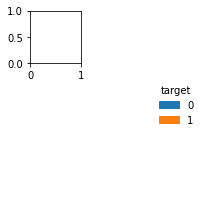

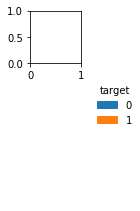

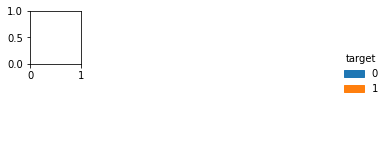

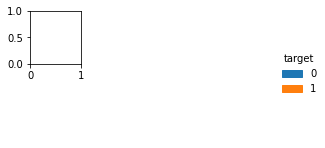

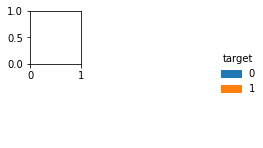

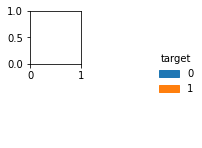

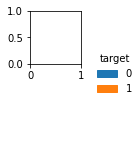

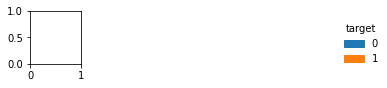

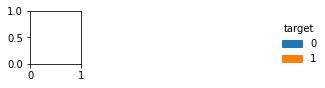

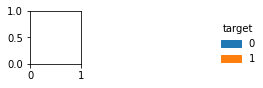

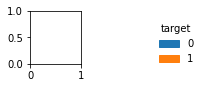

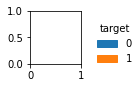

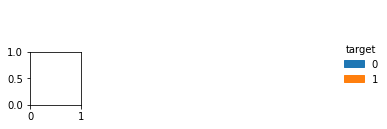

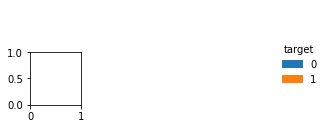

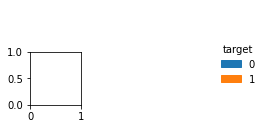

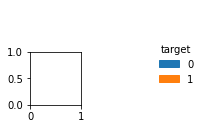

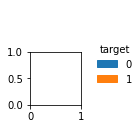

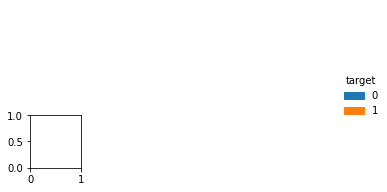

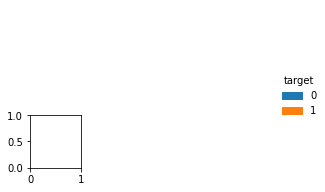

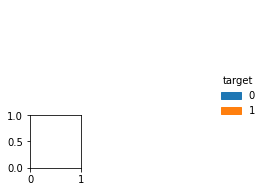

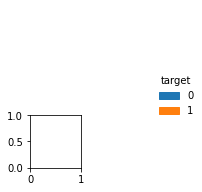

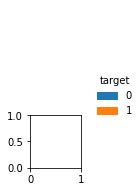

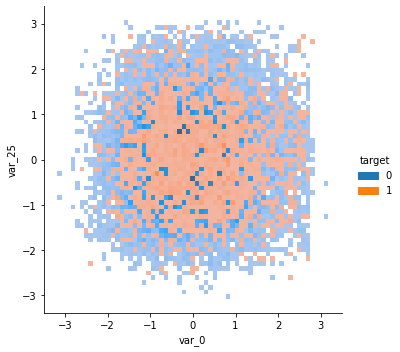

In [15]:
plt.subplots(5,5,figsize=(15,15))
for i in range(1,26):
    plt.subplot(5,5,i)    
    sns.displot( x=x_train["var_0"], y=x_train["var_"+str(i)], hue=y_train)

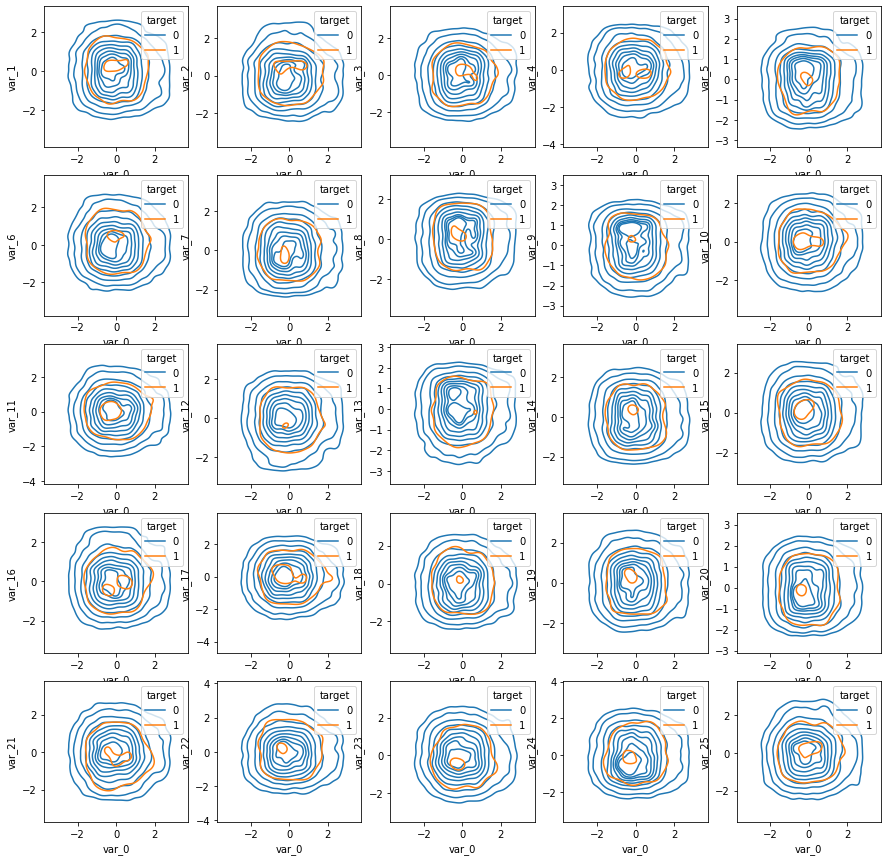

In [16]:
plt.subplots(5,5,figsize=(15,15))
for i in range(1,26):
    plt.subplot(5,5,i)    
    sns.kdeplot( x=x_train["var_0"], y=x_train["var_"+str(i)], hue=y_train)

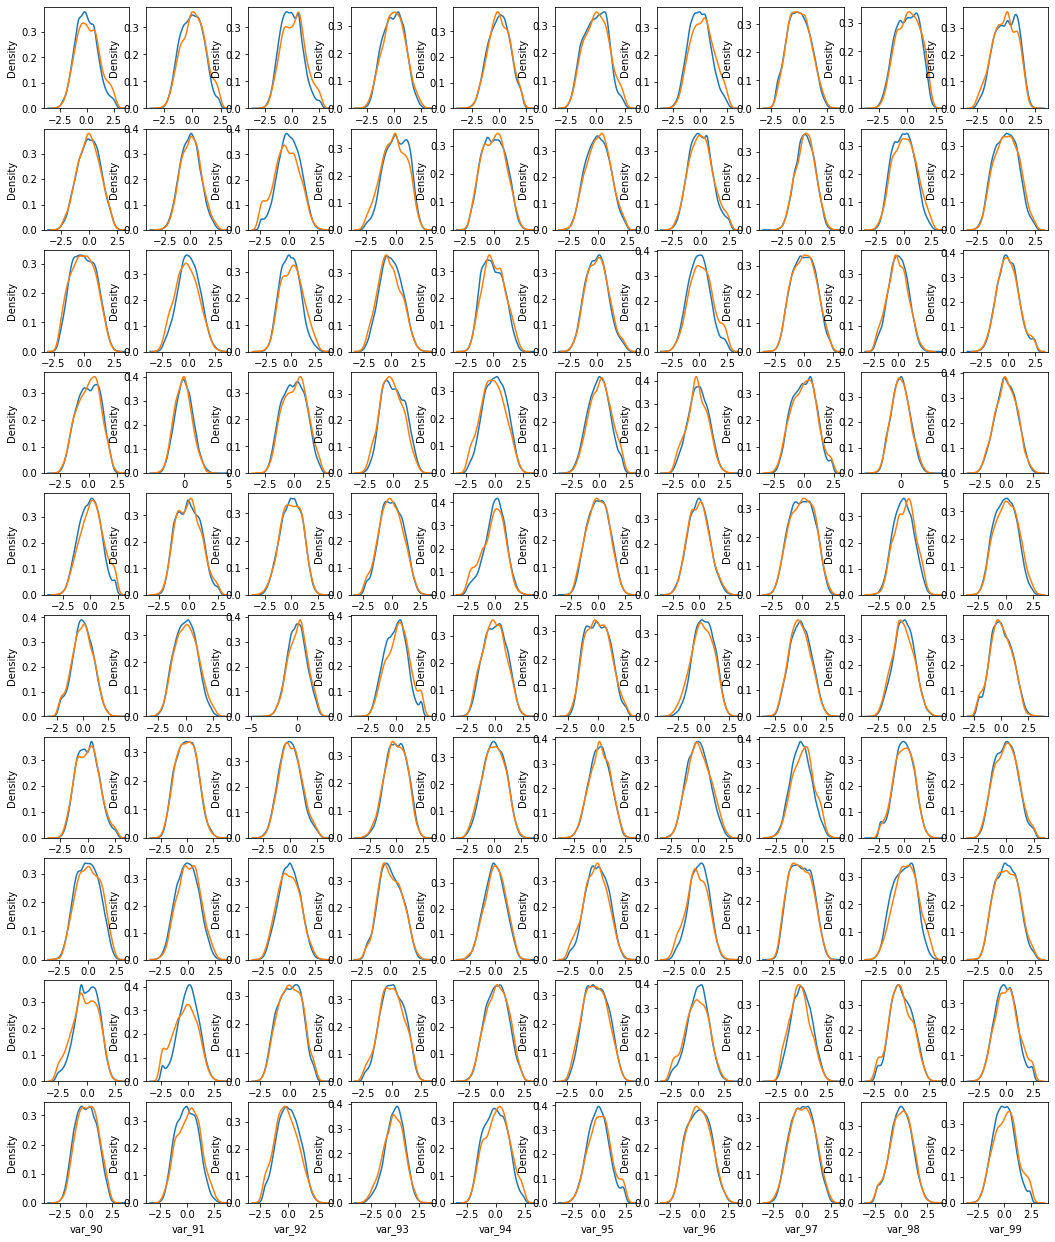

In [17]:
plt.subplots(10,10,figsize=(18,22))
for i in range(100):
        
        x_0=x_train.loc[y_train==0,"var_"+str(i)]
        x_1=x_train.loc[y_train==1,"var_"+str(i)]
        plt.subplot(10,10,i+1)
        sns.distplot(x_0, hist=False,label="0")
        sns.distplot(x_1, hist=False,label="1")
    

In [18]:
from sklearn.svm import SVC
svc_2=SVC(C= 10, gamma= 0.001, kernel= 'rbf')
svc_2.fit(x_train,y_train)
print('train',svc_2.score(x_train,y_train))
print('test',svc_2.score(x_test,y_test))
#Best Score is : 0.9122500070616031
#Best Parameters are : {'C': 0.001, 'coef0': 100, 'degree': 3, 'kernel': 'poly'}

train 0.96145
test 0.91605


In [19]:

#pramter=[ {"kernel":["rbf"],"gamma":[0.1,0.001,5] ,"C":[0.001,0.01,5,10,100,1000]      },
#             {"kernel":["poly"] ,"degree":[2,3],"coef0":[1,100],"C":[0.001,0.01,5,10,100,1000]}  ] 

pramter={"kernel":["poly"] ,"degree":[2,3],"coef0":[1,100],"C":[0.001,0.01,5,10,100,1000]} 
GridSearchCV=GridSearchCV(estimator=SVC(),param_grid=pramter,cv=3,verbose=True,n_jobs=-1,  return_train_score=True)
GridSearchCV.fit(x_train,y_train)
print('Best Score is :', GridSearchCV.best_score_)
print('Best Parameters are :', GridSearchCV.best_params_)

# output C= 10, gamma= 0.001, kernel= 'rbf'
#          {'C': 0.001, 'coef0': 100, 'degree': 3, 'kernel': 'poly'}

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Score is : 0.9122500070616031
Best Parameters are : {'C': 0.001, 'coef0': 100, 'degree': 3, 'kernel': 'poly'}


<AxesSubplot:ylabel='Count'>

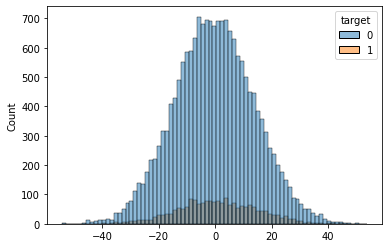

In [20]:
x_sum=np.sum(x_train,axis=1) #sum row
sns.histplot( x=x_sum, hue=y_train)

In [21]:
from sklearn.ensemble import RandomForestClassifier
Random=RandomForestClassifier()
Random.fit(x_train,y_train)
print("trane score :",Random.score(x_train,y_train))
print('-'*40)
pred=Random.predict(x_test)
print(confusion_matrix(pred,y_test))
print('-'*40)
accuracy_score(pred,y_test)

trane score : 1.0
----------------------------------------
[[17990  2010]
 [    0     0]]
----------------------------------------


0.8995

In [22]:
# random_forest=RandomForestClassifier()
# pramter={'criterion' :['gini', 'entropy'],'n_estimators':list(range(150,200,5)) , 'max_leaf_nodes': list(range(5,20,2))   }
# GridSearchCV=GridSearchCV(estimator=random_forest,param_grid=pramter,verbose=True,n_jobs=-1,cv=3,return_train_score=True)
# GridSearchCV.fit(x_train,y_train)
# print('Best Score is :', GridSearchCV.best_score_)
# print('Best Parameters are :', GridSearchCV.best_params_)

In [23]:
from sklearn.naive_bayes import GaussianNB  
Gaussian=GaussianNB()
Gaussian.fit(x_train,y_train)

pred=Gaussian.predict(x_test)
print(confusion_matrix(pred,y_test))
print('-'*40)
accuracy_score(pred,y_test)

[[17644  1282]
 [  346   728]]
----------------------------------------


0.9186

In [24]:
x_train, x_val, y_train, y_val = train_test_split(X_std, Y, train_size=0.10,test_size=0.80,stratify=Y, random_state=44, shuffle =True)


In [25]:
# from sklearn.svm import SVC
# svc_2=SVC(C= 10, gamma= 0.001, kernel= 'rbf')
# svc_2.fit(x_train,y_train)
print('train',svc_2.score(x_train,y_train))
print('-'*40)
print('test',svc_2.score(x_test,y_test))
pred=svc_2.predict(x_test)
print('-'*40)

print(confusion_matrix(pred,y_test))
print('-'*40)
accuracy_score(pred,y_test)

train 0.96145
----------------------------------------
test 0.91605
----------------------------------------
[[17743  1432]
 [  247   578]]
----------------------------------------


0.91605

In [26]:
sample_submission =pd.read_csv('../input/santander-customer-transaction-prediction/sample_submission.csv')#, index_col='ID_code'
sample_submission.head()

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0


In [27]:
res =svc_2.predict(data_test)
output=pd.DataFrame({"ID_code":sample_submission["ID_code"]   ,"target":res})
output.to_csv("output.csv",index=False)